Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import missingno as msno #for missing values
from sklearn.impute import SimpleImputer , KNNImputer

#reading dataset
drive.mount('/content/gdrive')
data_dir = '/content/gdrive/My Drive/DS/'
df = pd.read_csv(f"{data_dir}/original_data.csv")
st= pd.read_csv(f"{data_dir}/score.csv")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:


%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [ ]:
df.sample(5)

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,termAndYear,confPubs,ugCollege,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit
3258,swini266,Computer Engineering,0,0,NaN,101.0,MS,ECE,NaN,0.0,...,Fall - 2011,0,NIT Durgapur,NaN,8.84,NaN,10,NaN,University of Utah,0
21894,jsathish1990,Electrical Engineering,0,0,Power Electronics,100.0,MS,EEE,NaN,0.0,...,Fall - 2012,0,SSN College of Engineering,NaN,8.61,NaN,10,NaN,University of Colorado Boulder,1
4466,madzolo,Computer Science,0,0,NaN,111.0,MS,Computer Engg,NaN,0.0,...,Fall - 2014,0,MU,NaN,72.87,NaN,100,NaN,University of Texas Dallas,1
37559,doineo,Computer Science,0,0,NaN,108.0,MS,Computer Science,NaN,0.0,...,Fall - 2012,0,VTU,NaN,72.00,NaN,100,NaN,Ohio State University Columbus,0
2110,supanekar15,Electronics and Communication,0,0,Embedded/Comp Arch/Computer Networking,110.0,MS,ENTC,28,0.0,...,Fall - 2012,0,PICT,NaN,81.00,NaN,100,NaN,University of Wisconsin Madison,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userName         53644 non-null  object 
 1   major            53257 non-null  object 
 2   researchExp      53644 non-null  int64  
 3   industryExp      53644 non-null  int64  
 4   specialization   31949 non-null  object 
 5   toeflScore       49230 non-null  float64
 6   program          53322 non-null  object 
 7   department       53643 non-null  object 
 8   toeflEssay       11874 non-null  object 
 9   internExp        53630 non-null  float64
 10  greV             52388 non-null  float64
 11  greQ             52424 non-null  float64
 12  userProfileLink  53644 non-null  object 
 13  journalPubs      53322 non-null  object 
 14  greA             50786 non-null  float64
 15  topperCgpa       53641 non-null  float64
 16  termAndYear      53322 non-null  object 
 17  confPubs    

In [ ]:
df.describe()

,researchExp,industryExp,toeflScore,internExp,greV,greQ,greA,topperCgpa,gmatA,cgpa,gmatQ,cgpaScale,gmatV,admit
count,53644.000000,53644.000000,49230.000000,53630.000000,52388.000000,52424.000000,50786.000000,53641.000000,119.000000,53644.000000,123.000000,53644.000000,114.000000,53644.000000
mean,0.339535,4.056539,109.558826,0.454317,324.457108,422.485999,5.065241,35.754780,6.117647,39.343456,49.325203,55.264820,34.885965,0.521121
std,2.602942,12.028282,35.851480,2.482900,214.403370,320.238652,36.843511,37.442863,12.612327,33.240369,22.288531,45.638637,21.973741,0.499558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,8.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,101.000000,0.000000,152.000000,162.000000,3.000000,8.100000,4.000000,8.170000,46.000000,10.000000,27.000000,0.000000
50%,0.000000,0.000000,107.000000,0.000000,159.000000,168.000000,3.500000,9.600000,5.000000,10.000000,48.000000,100.000000,31.000000,1.000000
75%,0.000000,0.000000,111.000000,0.000000,550.000000,780.000000,4.000000,80.000000,5.000000,71.727500,50.000000,100.000000,34.000000,1.000000
max,53.000000,138.000000,1350.000000,96.000000,5560.000000,7990.000000,1470.000000,100.000000,102.000000,833.000000,168.000000,100.000000,152.000000,1.000000


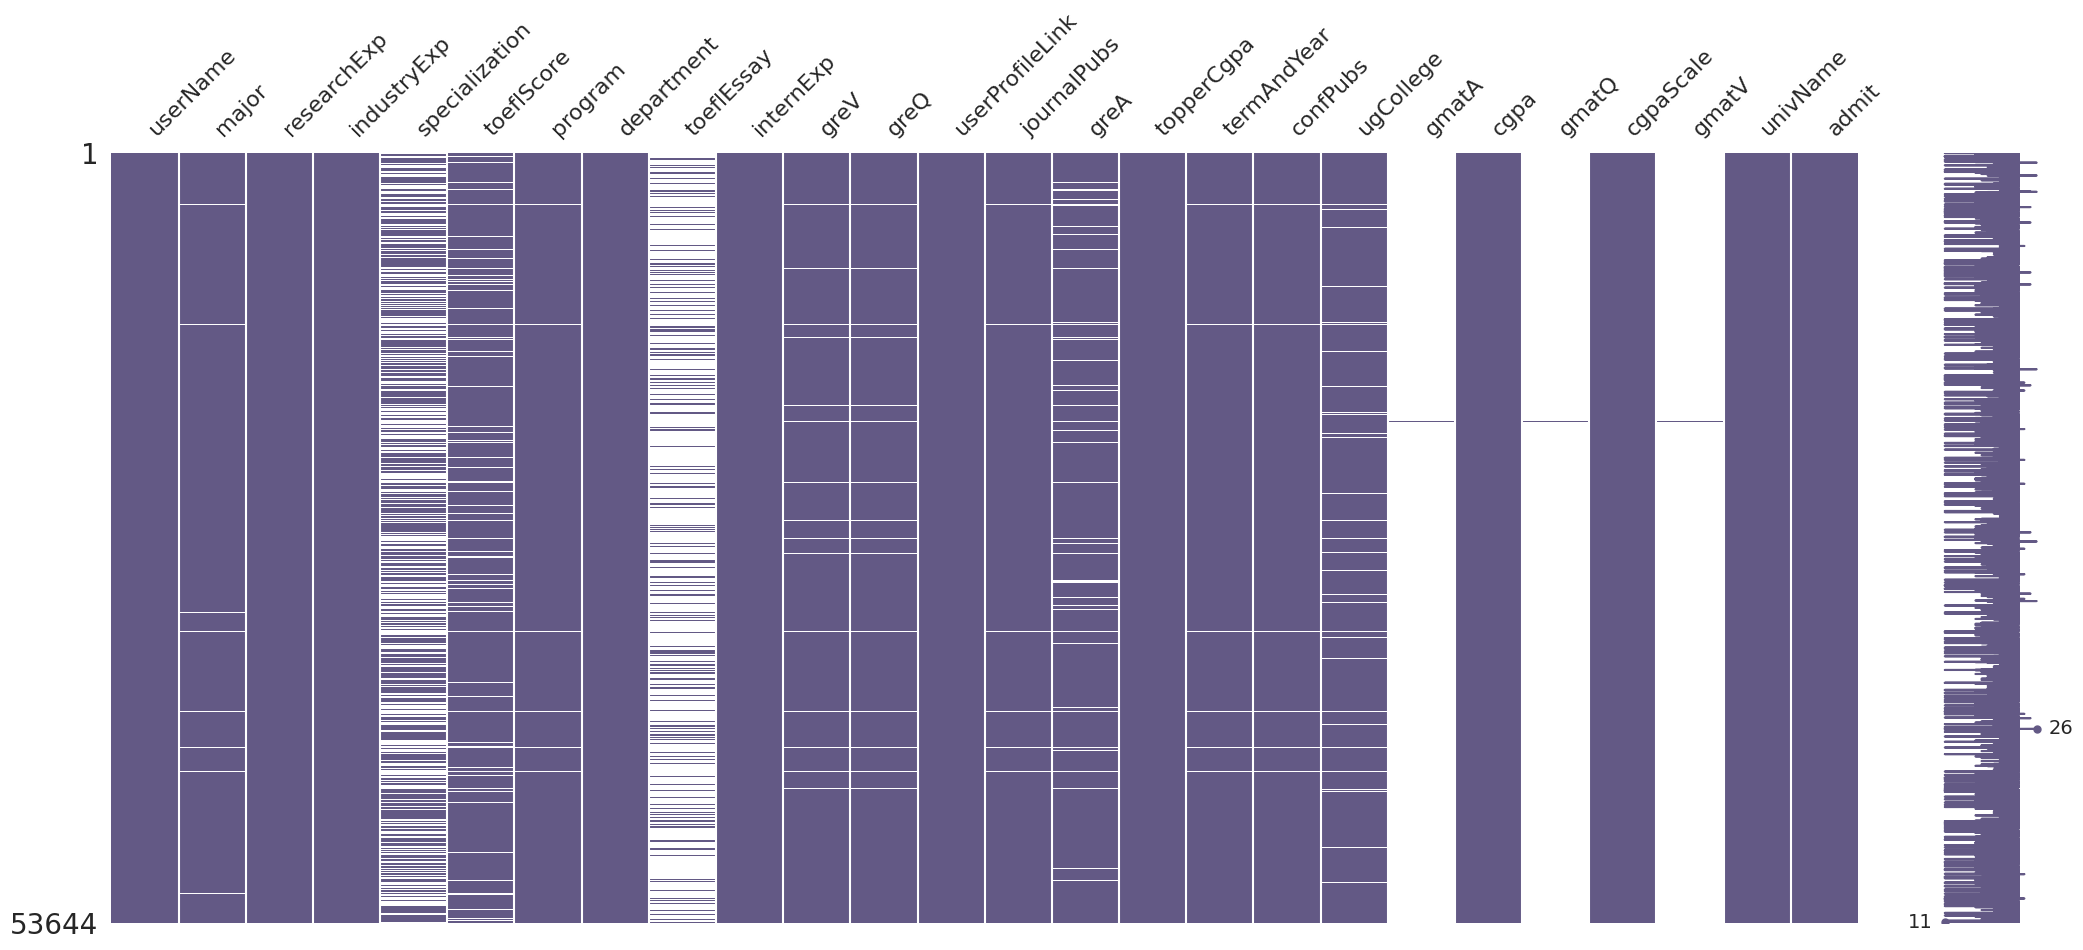

In [ ]:
msno.matrix(df, color=(99/255, 89/255, 133/255))
plt.show()

In [ ]:
df.columns


Index(['userName', 'major', 'researchExp', 'industryExp', 'specialization',
       'toeflScore', 'program', 'department', 'toeflEssay', 'internExp',
       'greV', 'greQ', 'userProfileLink', 'journalPubs', 'greA', 'topperCgpa',
       'termAndYear', 'confPubs', 'ugCollege', 'gmatA', 'cgpa', 'gmatQ',
       'cgpaScale', 'gmatV', 'univName', 'admit'],
      dtype='object')

In [ ]:
for col in [ 'major', 'researchExp', 'industryExp', 'specialization',
       'toeflScore', 'program', 'department', 'toeflEssay', 'internExp',
       'greV', 'greQ', 'userProfileLink', 'journalPubs', 'greA', 'topperCgpa',
       'termAndYear', 'confPubs', 'ugCollege', 'gmatA', 'cgpa', 'gmatQ',
       'cgpaScale', 'gmatV']:
    print(f'-------{col}-------')
    print(df[col].unique())
    print('________________________'*3)

-------major-------
['Systems and Control' 'Manufacturing Engineering'
 '(MIS / MSIM / MSIS / MSIT)' nan 'MIS' 'MIS-management related courses'
 'Computer Science' 'Mechanical Engineering' 'Robotics'
 'Electronics and Communication' 'Information Systems'
 'Human Computer Interaction' 'Electrical Engineering' 'Game Development'
 'Information Technology' 'Finance'
 'Computer Graphics and Game Technology' 'Computer Engineering'
 'Computer Engineering / Computer Networking / Computer Science'
 'Telecommunication' 'Management Information System' 'Data Science'
 'Electronic and Telecommunication Engineering' 'Biomedical Engineering'
 'Industrial Engineering' 'CS' 'Biotechnology/bio-engineering'
 'software engineering' 'Mechatronics/Robotics' 'Engineering Management'
 'Automotive Engineering' 'Mechanical / Industrial Engg.'
 'renewable energy' 'bio medical science'
 'Electrical and Computer Engineering' 'Industrial Engg/Robotics'
 'Computational Science and Engineering' 'Electrical Engg/ comp

In [ ]:
def sum_scor(scor):
    calc_scor = scor['researchExp']+scor['industryExp']+scor['toeflScore']+scor['internExp']+scor['greQ']+scor['greA']+scor['topperCgpa']+scor['cgpa']
    return calc_scor

df['total_scor']=df.apply(sum_scor,axis=1)
df

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,confPubs,ugCollege,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor
0,143saf,Systems and Control,0,18,Robotics,112.0,MS,Instrumentation & Control,26,5.0,...,0,Dharamsinh Desai University,NaN,8.50,NaN,10,NaN,Worcester Polytechnic Institute,1,323.90
1,7790ashish,Manufacturing Engineering,0,0,NaN,NaN,MS,0,NaN,0.0,...,0,NaN,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1,NaN
2,AB25,(MIS / MSIM / MSIS / MSIT),0,66,NaN,94.0,MS,Computer Engineering,21,0.0,...,0,IET DAVV,NaN,78.28,NaN,100,NaN,Worcester Polytechnic Institute,1,479.28
3,abhijitg,NaN,0,0,NaN,NaN,NaN,0,NaN,0.0,...,NaN,NaN,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1,NaN
4,abhijitgang,MIS,0,0,NaN,81.0,MS,computer,NaN,0.0,...,0,Pune University,NaN,57.00,NaN,100,NaN,Worcester Polytechnic Institute,1,980.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53639,zapp11,Mechanical Engineering,0,24,Thermal Sciences,98.0,MS,Production Engineering,24,12.0,...,0,University of Mumbai,NaN,71.00,NaN,100,NaN,Arizona State University,0,360.00
53640,zathurian,Electronics and Communication,0,0,Communication,115.0,MS,Electronics and Communication Engineering,30,0.0,...,0,BITS Hyderabad,NaN,6.50,NaN,10,NaN,Arizona State University,0,936.00
53641,zeal_vyas,Electrical Engineering,0,0,Computer Networks/Telecommunications,NaN,MS,Electronics and Telecommunication,NaN,0.0,...,0,NMIMS,NaN,3.55,NaN,4,NaN,Arizona State University,0,NaN
53642,zidanefaraday,Electrical Engineering,0,0,Power System Electric Machinery,99.0,MS,University Institute of Engineering and Techno...,NaN,0.0,...,0,Panjab University,NaN,70.50,NaN,100,NaN,Arizona State University,0,1019.00


In [ ]:
df['season']=df['termAndYear'] .str.split('-').str[0]
df.head()

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,ugCollege,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season
0,143saf,Systems and Control,0,18,Robotics,112.0,MS,Instrumentation & Control,26,5.0,...,Dharamsinh Desai University,NaN,8.50,NaN,10,NaN,Worcester Polytechnic Institute,1,323.90,Fall
1,7790ashish,Manufacturing Engineering,0,0,NaN,NaN,MS,0,NaN,0.0,...,NaN,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1,NaN,Fall
2,AB25,(MIS / MSIM / MSIS / MSIT),0,66,NaN,94.0,MS,Computer Engineering,21,0.0,...,IET DAVV,NaN,78.28,NaN,100,NaN,Worcester Polytechnic Institute,1,479.28,Fall
3,abhijitg,NaN,0,0,NaN,NaN,NaN,0,NaN,0.0,...,NaN,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1,NaN,NaN
4,abhijitgang,MIS,0,0,NaN,81.0,MS,computer,NaN,0.0,...,Pune University,NaN,57.00,NaN,100,NaN,Worcester Polytechnic Institute,1,980.50,Fall


In [ ]:
df['Year']=df['termAndYear'] .str.split('-').str[1]
df.head()

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season,Year
0,143saf,Systems and Control,0,18,Robotics,112.0,MS,Instrumentation & Control,26,5.0,...,NaN,8.50,NaN,10,NaN,Worcester Polytechnic Institute,1,323.90,Fall,2015
1,7790ashish,Manufacturing Engineering,0,0,NaN,NaN,MS,0,NaN,0.0,...,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1,NaN,Fall,2013
2,AB25,(MIS / MSIM / MSIS / MSIT),0,66,NaN,94.0,MS,Computer Engineering,21,0.0,...,NaN,78.28,NaN,100,NaN,Worcester Polytechnic Institute,1,479.28,Fall,2015
3,abhijitg,NaN,0,0,NaN,NaN,NaN,0,NaN,0.0,...,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1,NaN,NaN,NaN
4,abhijitgang,MIS,0,0,NaN,81.0,MS,computer,NaN,0.0,...,NaN,57.00,NaN,100,NaN,Worcester Polytechnic Institute,1,980.50,Fall,2011


In [ ]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y/%m/%d', errors='coerce')
df['Year'] = df['Year'].dt.year
df['Year'].unique

<bound method Series.unique of 0        2015.0
1        2013.0
2        2015.0
3           NaN
4        2011.0
          ...  
53639    2014.0
53640    2012.0
53641    2013.0
53642    2011.0
53643    2011.0
Name: Year, Length: 53644, dtype: float64>

In [ ]:
imputer = KNNImputer()
df['Year'] = imputer.fit_transform(df[['Year']])
df['Year']=df['Year'].apply(int)
df['Year'].value_counts()

2012    12335
2013    11148
2011    10476
2014     9844
2015     6956
2006      806
2010      580
2007      489
2016      478
2008      275
2009      227
2005       15
2103        5
2017        3
1992        2
2105        2
1989        1
1990        1
2112        1
Name: Year, dtype: int64

In [ ]:
for col in [ 'researchExp','industryExp','toeflScore','internExp','greQ','greA','topperCgpa','cgpa','cgpaScale','toeflEssay','journalPubs','confPubs']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df[df['industryExp']==df['industryExp'].max()]

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season,Year
44999,infosec18,Information Security,0,138,NaN,NaN,MS,Computer Science,NaN,0.0,...,NaN,2.0,NaN,4,NaN,Georgia Institute of Technology,1,NaN,Fall,2015


In [ ]:
df[df['industryExp']==df['industryExp'].max()]

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season,Year
44999,infosec18,Information Security,0,138,NaN,NaN,MS,Computer Science,NaN,0.0,...,NaN,2.0,NaN,4,NaN,Georgia Institute of Technology,1,NaN,Fall,2015


In [ ]:
df[df['researchExp']==df['researchExp'].max()]

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season,Year
246,Prashanthslm,Industrial Engineering,53,53,NaN,95.0,MS,Mechanical,NaN,3.0,...,NaN,7.48,NaN,10,NaN,Wayne State University,1,375.88,Fall,2015
44236,Prashanthslm,Industrial Engineering,53,53,NaN,95.0,MS,Mechanical,NaN,3.0,...,NaN,7.48,NaN,10,NaN,New Jersey Institute of Technology,1,375.88,Fall,2015


In [ ]:
df.groupby("univName").describe()[['toeflScore','internExp','topperCgpa']].transpose()

univName          Arizona State University  \
toeflScore count               2907.000000   
           mean                 108.442036   
           std                   33.836033   
           min                    0.000000   
           25%                   99.000000   
           50%                  105.000000   
           75%                  110.000000   
           max                 1004.000000   
internExp  count               3175.000000   
           mean                   0.435591   
           std                    1.651466   
           min                    0.000000   
           25%                    0.000000   
           50%                    0.000000   
           75%                    0.000000   
           max                   24.000000   
topperCgpa count               3175.000000   
           mean                  35.751966   
           std                   37.519184   
           min                    0.000000   
           25%                    8.800000   
           50%                    9.600000   
           75%                   80.000000   
           max                  100.000000   

univName          California Institute of Technology  \
toeflScore count                           30.000000   
           mean                           103.233333   
           std                             20.235993   
           min                              7.000000   
           25%                            104.000000   
           50%                            107.500000   
           75%                            112.750000   
           max                            118.000000   
internExp  count                           54.000000   
           mean                             0.222222   
           std                              1.003140   
           min                              0.000000   
           25%                              0.000000   
           50%                              0.000000   
           75%                              0.000000   
           max                              6.000000   
topperCgpa count                           54.000000   
           mean                            21.292278   
           std                             32.245708   
           min                              0.000000   
           25%                              0.000000   
           50%                              9.150000   
           75%                              9.940000   
           max                             90.000000   

univName          Carnegie Mellon University  Clemson University  \
toeflScore count                 1289.000000          707.000000   
           mean                   110.118697          103.545969   
           std                     22.420925           24.833989   
           min                      7.000000            0.000000   
           25%                    105.000000           96.000000   
           50%                    110.000000          104.000000   
           75%                    114.000000          109.000000   
           max                    680.000000          290.000000   
internExp  count                 1412.000000          779.000000   
           mean                     0.359773            0.359435   
           std                      1.620920            1.666762   
           min                      0.000000            0.000000   
           25%                      0.000000            0.000000   
           50%                      0.000000            0.000000   
           75%                      0.000000            0.000000   
           max                     24.000000           20.000000   
topperCgpa count                 1412.000000          779.000000   
           mean                    32.248612           38.176318   
           std                     36.634571           37.900995   
           min                      0.000000            0.000000   
           25%      

In [ ]:
df.groupby("univName").describe()[['topperCgpa','cgpa','cgpaScale']].transpose()

univName          Arizona State University  \
topperCgpa count               3175.000000   
           mean                  35.751966   
           std                   37.519184   
           min                    0.000000   
           25%                    8.800000   
           50%                    9.600000   
           75%                   80.000000   
           max                  100.000000   
cgpa       count               3176.000000   
           mean                  38.256379   
           std                   33.057561   
           min                    0.000000   
           25%                    8.040000   
           50%                    9.240000   
           75%                   72.500000   
           max                   99.000000   
cgpaScale  count               3176.000000   
           mean                  53.011650   
           std                   45.464630   
           min                    0.000000   
           25%                   10.000000   
           50%                   10.000000   
           75%                  100.000000   
           max                  100.000000   

univName          California Institute of Technology  \
topperCgpa count                           54.000000   
           mean                            21.292278   
           std                             32.245708   
           min                              0.000000   
           25%                              0.000000   
           50%                              9.150000   
           75%                              9.940000   
           max                             90.000000   
cgpa       count                           54.000000   
           mean                            24.340056   
           std                             32.589809   
           min                              0.000000   
           25%                              3.700000   
           50%                              8.265000   
           75%                             47.400750   
           max                             88.000000   
cgpaScale  count                           54.000000   
           mean                            36.018519   
           std                             43.922956   
           min                              0.000000   
           25%                              4.250000   
           50%                             10.000000   
           75%                            100.000000   
           max                            100.000000   

univName          Carnegie Mellon University  Clemson University  \
topperCgpa count                 1412.000000          779.000000   
           mean                    32.248612           38.176318   
           std                     36.634571           37.900995   
           min                      0.000000            0.000000   
           25%                      0.000000            8.205000   
           50%                      9.585000            9.500000   
           75%                     78.000000           80.000000   
           max                    100.000000           95.000000   
cgpa       count                 1412.000000          779.000000   
           mean                    35.651721           42.013583   
           std                     32.627982           31.408032   
           min                      0.000000            0.000000   
           25%                      8.050000            8.085000   
           50%                      9.235000           58.500000   
           75%                     70.850000           71.000000   
           max                     96.400000           89.000000   
cgpaScale  count                 1412.000000          779.000000   
           mean                    49.888810           60.644416   
           std                     45.643284           45.138241   
           min                      0.000000            0.000000   
           25%      

In [ ]:
df[(df['userName']==1)][['admit']]

,admit


In [ ]:
df[['userName']].value_counts()==1

userName      
shah.abid         False
pulkitsachdeva    False
medhavi1607       False
venkatsubbu44     False
mukho1708         False
                  ...  
sankyb             True
jazzyroamer        True
sannu1854          True
jayshah376         True
gomzinikon         True
Length: 14798, dtype: bool

In [ ]:
df[(df['confPubs']==1)&(df['admit']==1)][['userName','ugCollege','major','univName']]

,userName,ugCollege,major,univName
261,renjithgizmo,Amrita School of Engineering,Electrical Engineering,Wayne State University
271,saps013,Netaji Subhas Institute of Technology,Electrical Engineering,Wayne State University
302,venkateshgre300,See mangalore/vtu Karnataka,Mechanical Engineering,Wayne State University
337,aamedh,IIT Indore,Industrial Engineering,Virginia Polytechnic Institute and State Unive...
345,Aditya23456,NIT-warangal,Electrical Engineering,Virginia Polytechnic Institute and State Unive...
...,...,...,...,...
52135,shleshst,VIT University,Electrical Engineering,Arizona State University
52146,shrivallabh,Dr. Babasaheb Ambedkar Technological Universit...,Industrial Engineering,Arizona State University
52217,spadet,Galgotia College of Engg & Technology (UPTU),Electrical Engineering,Arizona State University
52490,vimaleshm,SSN College of Engineering,Industrial Engineering,Arizona State University


In [ ]:
df.groupby("admit").describe()[['toeflScore','internExp','topperCgpa']].transpose()

admit                        0             1
toeflScore count  23964.000000  25266.000000
           mean     109.421257    109.689306
           std       32.013647     39.145590
           min        0.000000      0.000000
           25%      100.000000    101.000000
           50%      106.000000    107.000000
           75%      112.000000    111.000000
           max     1200.000000   1350.000000
internExp  count  25680.000000  27950.000000
           mean       0.528699      0.385975
           std        2.671092      2.294361
           min        0.000000      0.000000
           25%        0.000000      0.000000
           50%        0.000000      0.000000
           75%        0.000000      0.000000
           max       96.000000     96.000000
topperCgpa count  25687.000000  27954.000000
           mean      36.394047     35.167355
           std       37.298742     37.565886
           min        0.000000      0.000000
           25%        8.700000      3.600000
           50%        9.630000      9.600000
           75%       80.000000     80.000000
           max      100.000000    100.000000

<ipython-input-38-5203c0bab701>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[['toeflScore','internExp','topperCgpa']],annot=True,cmap='coolwarm')


<Axes: >

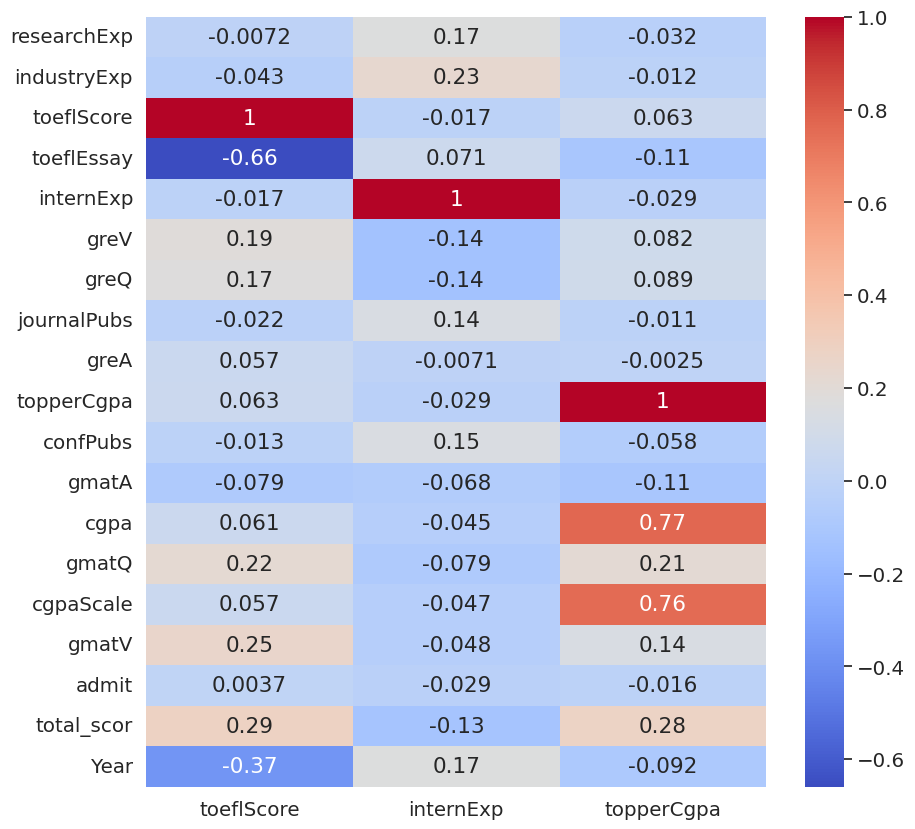

In [ ]:
sns.heatmap(df.corr()[['toeflScore','internExp','topperCgpa']],annot=True,cmap='coolwarm')


<ipython-input-37-6d60f71ba243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[['greQ','greV','greA']],annot=True, cmap='viridis')


<Axes: >

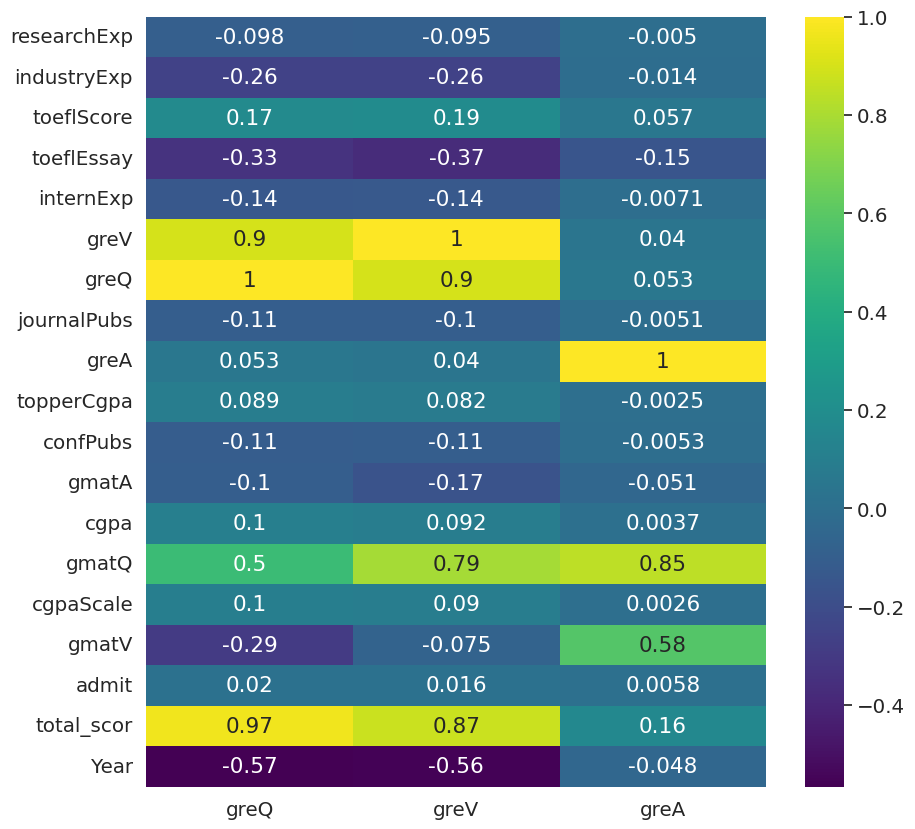

In [ ]:
sns.heatmap(df.corr()[['greQ','greV','greA']],annot=True, cmap='viridis')

<ipython-input-36-26918139c889>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")


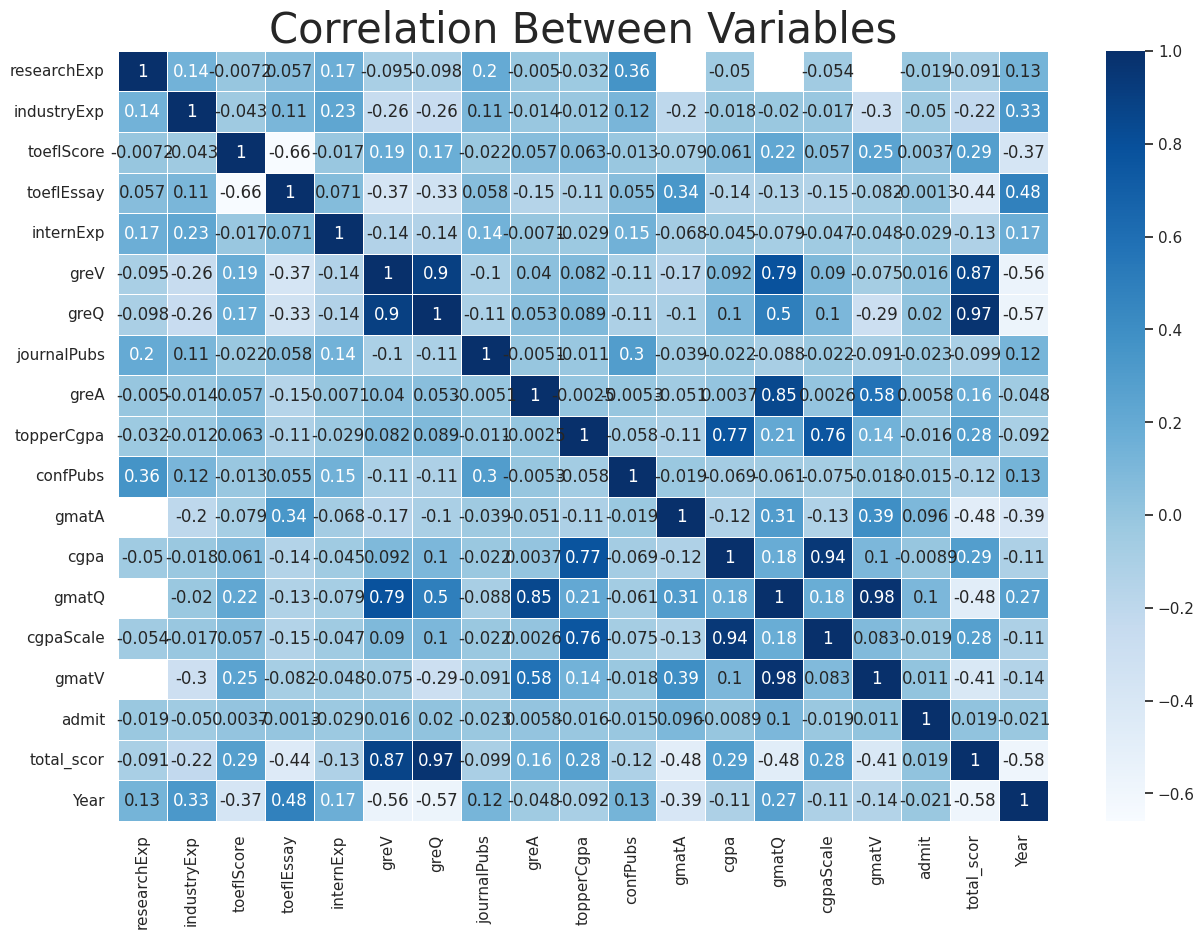

In [ ]:
sns.set(style="white")
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Correlation Between Variables', fontsize = 30)
plt.show()

In [ ]:
new_df=pd.pivot_table(data=df, values ='cgpa',columns ='univName',index ='admit')
new_df

univName,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,Johns Hopkins University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
admit,,,,,,,,,,,,,,,,,,,,,
0,42.936656,33.865433,35.278157,45.283086,34.934851,38.333000,47.968906,35.203461,22.565882,38.826711,...,40.010202,41.616603,30.813686,48.514829,42.445190,33.694637,32.756918,37.430346,45.933333,48.182941
1,35.931680,12.433333,35.878922,39.373705,31.586471,29.242841,49.655139,35.549328,26.044286,37.281510,...,40.265498,43.852087,19.422259,42.376739,41.065572,35.291508,21.417461,25.489954,37.110818,43.582427


In [ ]:
new_df2=pd.pivot_table(data=df, values ='researchExp',columns ='univName',index ='admit')
new_df2

univName,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,Johns Hopkins University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
admit,,,,,,,,,,,,,,,,,,,,,
0,0.351044,0.466667,0.342697,0.232759,0.364865,0.479167,0.37500,0.58554,0.176471,0.052632,...,0.292196,0.129771,0.599558,0.311137,0.703333,0.55157,0.599702,0.329897,0.00000,0.431373
1,0.484920,0.000000,0.430524,0.320186,0.308370,0.147287,0.17027,0.29590,0.000000,0.369369,...,0.338538,0.083721,0.771605,0.194390,0.717042,0.77381,0.348214,0.782178,0.72327,0.000000


In [ ]:
for new_df3 in [ 'industryExp','toeflScore','internExp','greQ','greA','topperCgpa','cgpa','cgpaScale']:
    print(f'-------{new_df3}-------')
    print(pd.pivot_table(data=df, values =[new_df3],columns ='univName',index ='admit'))
    print('________________________'*3)

-------industryExp-------
                      industryExp                                     \
univName Arizona State University California Institute of Technology   
admit                                                                  
0                        5.377609                           4.966667   
1                        3.860038                           0.000000   

                                                                            \
univName Carnegie Mellon University Clemson University Columbia University   
admit                                                                        
0                          4.039326           2.954023            4.247748   
1                          2.894077           3.429234            2.259912   

                                                     \
univName Cornell University George Mason University   
admit                                                 
0                  5.330357                5.812500   
1 

In [ ]:
[ 'researchExp','industryExp','toeflScore','internExp','greV','greQ','greA','topperCgpa','gmatA','cgpa','gmatQ','cgpaScale','','']

['researchExp',
 'industryExp',
 'toeflScore',
 'internExp',
 'greV',
 'greQ',
 'greA',
 'topperCgpa',
 'gmatA',
 'cgpa',
 'gmatQ',
 'cgpaScale',
 '',
 '']

In [ ]:
new_df2=pd.pivot_table(data=df, values ='toeflScore',columns ='univName',index ='admit')
new_df2

univName,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,Johns Hopkins University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
admit,,,,,,,,,,,,,,,,,,,,,
0,105.80805,104.565217,108.317814,99.235849,110.859903,110.664577,98.416667,109.436790,134.6,118.492958,...,104.196154,100.866071,114.907583,103.299124,113.512281,108.080952,109.353600,114.037736,102.400000,101.12766
1,109.75903,98.857143,111.237736,107.069409,118.136585,112.928571,104.646884,114.433852,114.0,122.670330,...,113.888717,102.464334,112.198582,103.917976,111.341549,110.855814,108.323671,119.859206,104.831933,103.50000


In [ ]:
new_df2=pd.pivot_table(data=df, values ='internExp',columns ='univName',index ='admit')
new_df2

univName,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,Johns Hopkins University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
admit,,,,,,,,,,,,,,,,,,,,,
0,0.518027,0.4,0.460674,0.347701,0.581081,0.812500,0.250000,0.699140,0.0,0.407895,...,0.505455,0.343511,0.652655,0.468427,0.746667,0.457399,0.725782,0.530191,1.166667,1.156863
1,0.394625,0.0,0.298405,0.368910,0.202643,0.387597,0.097297,0.365419,0.0,0.207207,...,0.519517,0.281395,0.364198,0.259684,0.485531,0.551587,0.419643,0.656766,0.389937,0.233010


In [ ]:
new_df2=pd.pivot_table(data=df, values ='greV',columns ='univName',index ='admit')
new_df2

univName,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,Johns Hopkins University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
admit,,,,,,,,,,,,,,,,,,,,,
0,257.163305,364.000000,329.104962,256.921053,386.856481,357.249249,251.671875,334.268116,393.470588,388.986842,...,301.115596,250.567050,374.442697,266.050926,327.463087,295.953704,343.160420,377.440476,262.652174,258.40000
1,306.928468,198.071429,342.600240,326.365796,420.986425,375.548117,339.024862,410.968921,251.250000,402.971963,...,335.747261,276.206854,368.967532,291.764778,301.678689,269.886555,333.004695,362.286689,222.469799,296.14433


In [ ]:
new_df2=pd.pivot_table(data=df, values ='greQ',columns ='univName',index ='admit')
new_df2

univName,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,Johns Hopkins University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
admit,,,,,,,,,,,,,,,,,,,,,
0,329.546590,464.241379,421.452290,362.384840,493.685185,448.120120,363.046875,425.242578,492.235294,518.144737,...,393.223443,356.704981,477.088764,348.379630,427.916107,368.773148,434.604198,483.043091,343.869565,377.32000
1,402.894737,290.714286,428.077844,435.855107,533.380090,472.564854,500.030220,513.870438,321.250000,501.841121,...,442.088321,385.079462,455.006452,399.733225,383.445902,327.647059,411.826291,477.593857,272.953020,420.55102


In [ ]:
new_df2=pd.pivot_table(data=df, values ='greA',columns ='univName',index ='admit')
new_df2

univName,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,Johns Hopkins University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
admit,,,,,,,,,,,,,,,,,,,,,
0,3.44077,3.892857,3.766075,6.027941,3.739336,3.804688,3.246032,4.814312,92.766667,3.657143,...,3.556415,3.232794,8.222706,4.220096,5.849315,3.652174,6.986068,4.709714,3.295455,19.265306
1,5.37902,3.769231,6.821679,7.917488,7.608796,4.021739,7.819885,9.268901,4.250000,3.924752,...,4.149358,5.095466,10.483219,4.977367,3.690476,9.270474,5.478365,3.830357,3.163194,9.771277


In [ ]:
new_df2=pd.pivot_table(data=df, values ='total_scor',columns ='univName',index ='admit')
new_df2

univName,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,Johns Hopkins University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
admit,,,,,,,,,,,,,,,,,,,,,
0,534.398502,678.237545,617.640470,565.058309,690.248990,641.530893,561.499322,616.640225,847.884615,739.123030,...,588.745606,587.146441,667.996072,562.658080,642.026893,548.646586,624.464307,683.795081,550.815789,591.671087
1,601.789807,383.844286,624.948756,648.894332,728.632543,664.476542,729.437752,714.064368,602.596667,761.679405,...,647.454662,595.150065,618.791757,601.612038,593.293284,532.991592,575.702256,649.429242,482.366667,612.110787


In [ ]:
df.groupby("admit").describe()['total_scor'].transpose()

admit,0,1
count,23345.000000,24357.000000
mean,617.846208,630.893746
std,344.166868,345.536681
min,78.100000,75.100000
25%,312.550000,307.700000
50%,435.500000,441.920000
75%,932.800000,936.420000
max,8455.600000,8455.600000


In [ ]:
df[df['total_scor']==df['total_scor'].max()]

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season,Year
348,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,Virginia Polytechnic Institute and State Unive...,1,8455.6,Fall,2006
6907,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,University of Texas Austin,0,8455.6,Fall,2006
12919,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,University of Minnesota Twin Cities,1,8455.6,Fall,2006
14439,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,University of Michigan Ann Arbor,0,8455.6,Fall,2006
16976,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,University of Illinois Urbana-Champaign,0,8455.6,Fall,2006
28524,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,Texas A and M University College Station,0,8455.6,Fall,2006
35951,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,Purdue University,1,8455.6,Fall,2006
45440,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,Georgia Institute of Technology,0,8455.6,Fall,2006
50593,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,Arizona State University,1,8455.6,Fall,2006


In [ ]:
df[(df['admit']==1)&df['season']].mode()[0:1:1]

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season,Year
0,disissid,Computer Science,0.0,0.0,VLSI,110.0,MS,Computer Science,29.0,0.0,...,5.0,0.0,49.0,100.0,27.0,University of Texas Dallas,1.0,424.5,Fall,2012.0


In [ ]:
df[(df['admit']==1)&df['major']].mode()[0:1:1]

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season,Year
0,disissid,Computer Science,0.0,0.0,VLSI,110.0,MS,Computer Science,29.0,0.0,...,5.0,0.0,49.0,100.0,27.0,University of Texas Dallas,1.0,424.5,Fall,2012.0


In [ ]:
df[(df['admit']==1)&df['userName']].mode()[:2:1]

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season,Year
0,disissid,Computer Science,0.0,0.0,VLSI,110.0,MS,Computer Science,29.0,0.0,...,5.0,0.0,49.0,100.0,27.0,University of Texas Dallas,1.0,424.5,Fall,2012.0
1,pralaybiswas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df['total_scor']==df['total_scor'].max()][:1:1][(df['admit']==1)&df['userName']].mode()

<ipython-input-58-def802bc0db9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['total_scor']==df['total_scor'].max()][:1:1][(df['admit']==1)&df['userName']].mode()


,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season,Year
0,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,Virginia Polytechnic Institute and State Unive...,1,8455.6,Fall,2006


In [ ]:
df[df['total_scor']==df['total_scor'].max()][:1:1][(df['admit']==1)]

<ipython-input-59-8bfc6c0b6384>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['total_scor']==df['total_scor'].max()][:1:1][(df['admit']==1)]


,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season,Year
348,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,Virginia Polytechnic Institute and State Unive...,1,8455.6,Fall,2006


In [ ]:
df.groupby("univName").describe()['total_scor'].transpose()

univName,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,Johns Hopkins University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
count,2837.000000,29.000000,1234.000000,687.000000,400.000000,524.000000,383.000000,1799.000000,16.000000,154.000000,...,1765.000000,935.000000,958.000000,2975.000000,556.000000,404.000000,815.000000,898.000000,136.000000,135.000000
mean,579.341875,607.177103,622.105987,610.942362,709.344807,650.989405,703.567341,643.988303,801.893125,752.012387,...,630.656887,593.326780,661.010908,591.490556,617.923040,540.664089,612.318668,673.500637,491.929412,605.146148
std,352.759724,338.610216,336.177393,325.266779,345.190706,322.772670,319.792938,380.189058,517.705287,334.361805,...,324.768665,308.699849,427.674393,316.578750,328.602332,312.060085,330.741372,423.636775,291.438290,362.079420
min,163.000000,217.110000,153.500000,181.950000,156.640000,270.400000,215.500000,174.270000,281.600000,272.500000,...,189.400000,120.210000,237.100000,75.100000,175.210000,155.300000,181.950000,181.950000,211.800000,146.500000
25%,298.680000,297.500000,302.982500,318.950000,318.632500,311.480000,402.750000,306.450000,401.555000,338.042500,...,311.490000,322.280000,304.400000,314.980000,310.012500,301.007500,302.485000,310.075000,286.605000,321.375000
50%,424.300000,434.100000,438.780000,428.300000,902.980000,469.500000,849.500000,448.500000,875.105000,918.600000,...,446.070000,423.000000,484.120000,425.000000,437.000000,410.210000,441.000000,816.255000,394.000000,412.000000
75%,918.380000,932.210000,936.575000,928.035000,976.065000,936.647500,976.750000,937.510000,972.377500,1031.125000,...,936.500000,915.470000,934.935000,919.450000,938.310000,904.987500,929.075000,938.992500,738.000000,940.250000
max,8455.600000,1075.000000,2412.000000,2373.000000,2451.260000,1263.000000,2089.000000,8455.600000,2240.100000,1273.200000,...,2061.000000,1934.000000,8455.600000,2412.000000,1914.380000,2352.400000,2451.260000,8455.600000,1904.000000,2373.000000


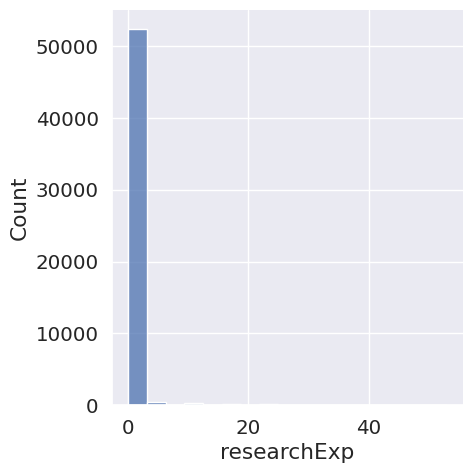

In [ ]:
sns.displot(df['researchExp'],kde=False)

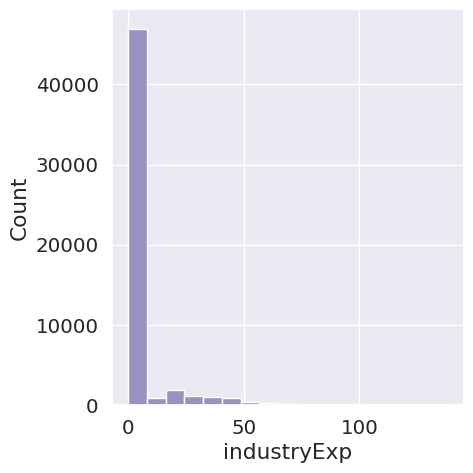

In [ ]:
sns.displot(df['industryExp'],kde=False,color='m')

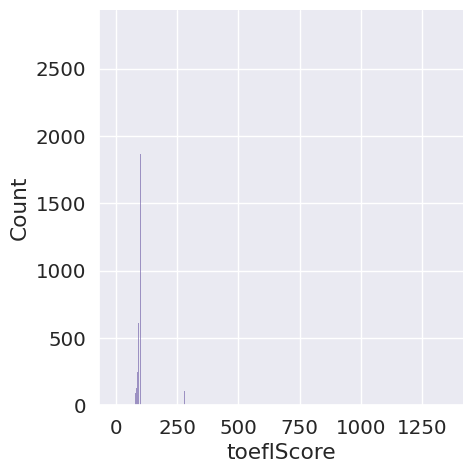

In [ ]:
sns.displot(df['toeflScore'],kde=False,color='m')

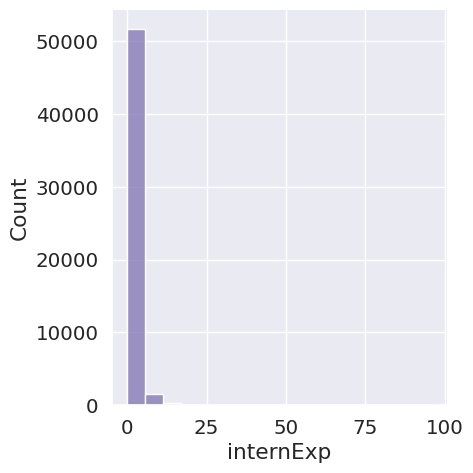

In [ ]:
sns.displot(df['internExp'],kde=False,color='m')

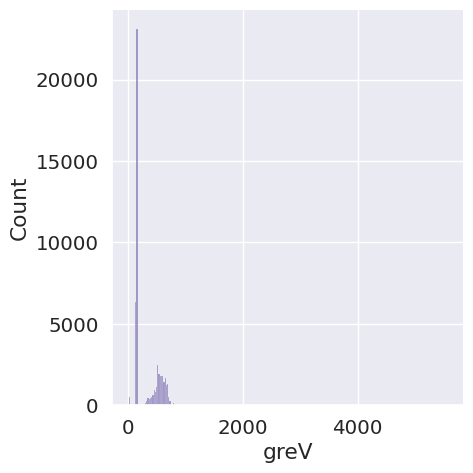

In [ ]:
sns.displot(df['greV'],kde=False,color='m')

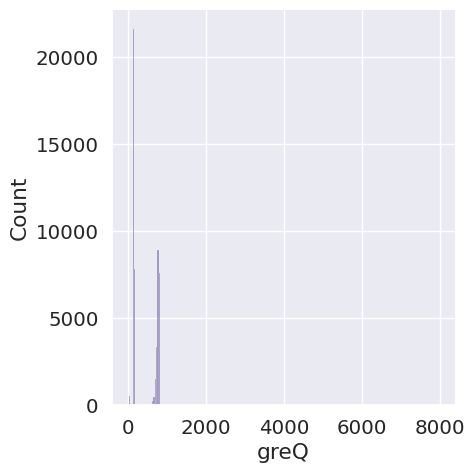

In [ ]:
sns.displot(df['greQ'],kde=False,color='m')

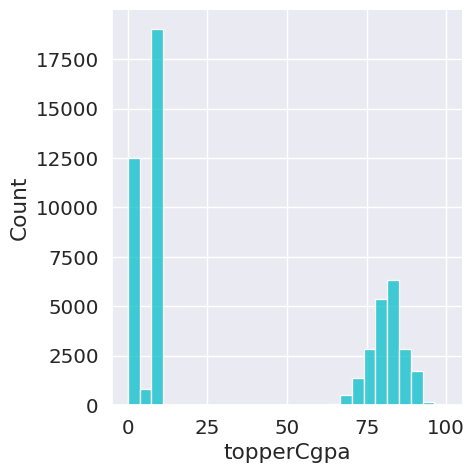

In [ ]:
sns.displot(df['topperCgpa'],kde=False, color=(5/255, 191/255, 202/255))

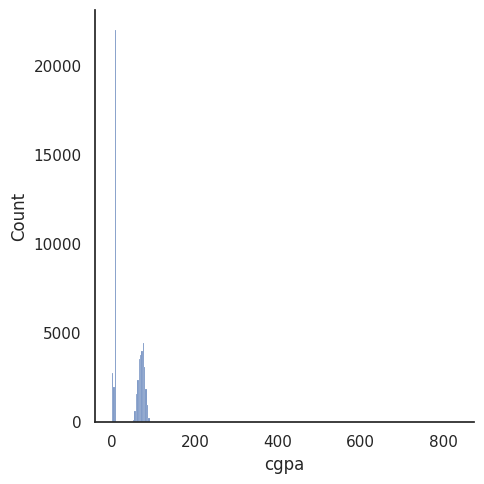

In [ ]:
sns.displot(df['cgpa'],kde=False)

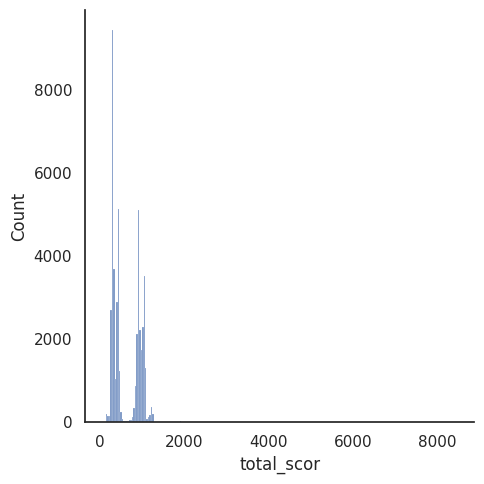

In [ ]:
sns.displot(df['total_scor'],kde=False)

In [ ]:
df.columns

Index(['userName', 'major', 'researchExp', 'industryExp', 'specialization',
       'toeflScore', 'program', 'department', 'toeflEssay', 'internExp',
       'greV', 'greQ', 'userProfileLink', 'journalPubs', 'greA', 'topperCgpa',
       'termAndYear', 'confPubs', 'ugCollege', 'gmatA', 'cgpa', 'gmatQ',
       'cgpaScale', 'gmatV', 'univName', 'admit', 'total_scor', 'season',
       'Year'],
      dtype='object')

<Axes: xlabel='total_scor', ylabel='confPubs'>

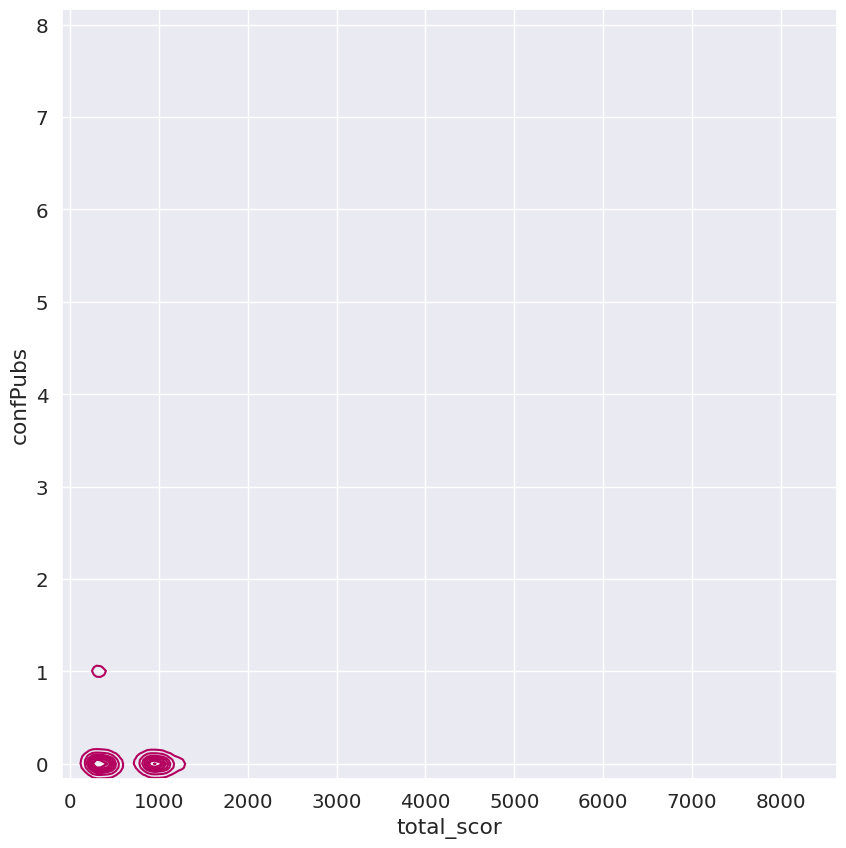

In [ ]:
sns.kdeplot(y='confPubs',x='total_scor',data=df, color=(179/255, 0/255, 94/255))

<Axes: xlabel='Year', ylabel='confPubs'>

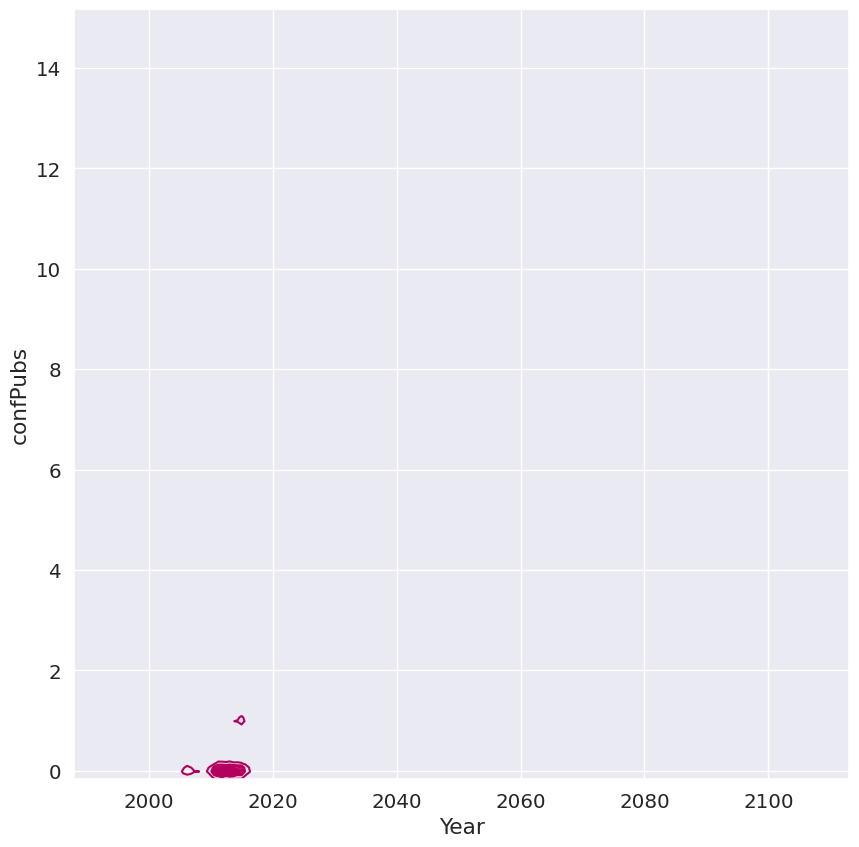

In [ ]:
sns.kdeplot(y='confPubs',x='Year',data=df, color=(179/255, 0/255, 94/255))

<Axes: xlabel='admit', ylabel='Year'>

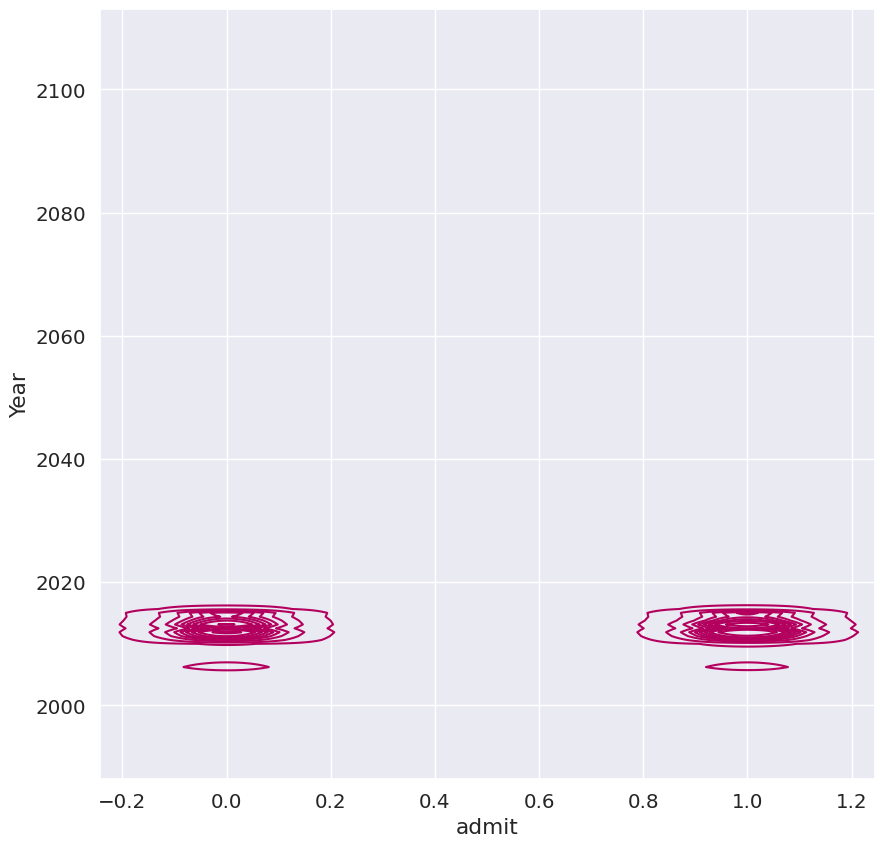

In [ ]:
sns.kdeplot(x='admit',y='Year',data=df, color=(179/255, 0/255, 94/255))

<Axes: xlabel='cgpa', ylabel='admit'>

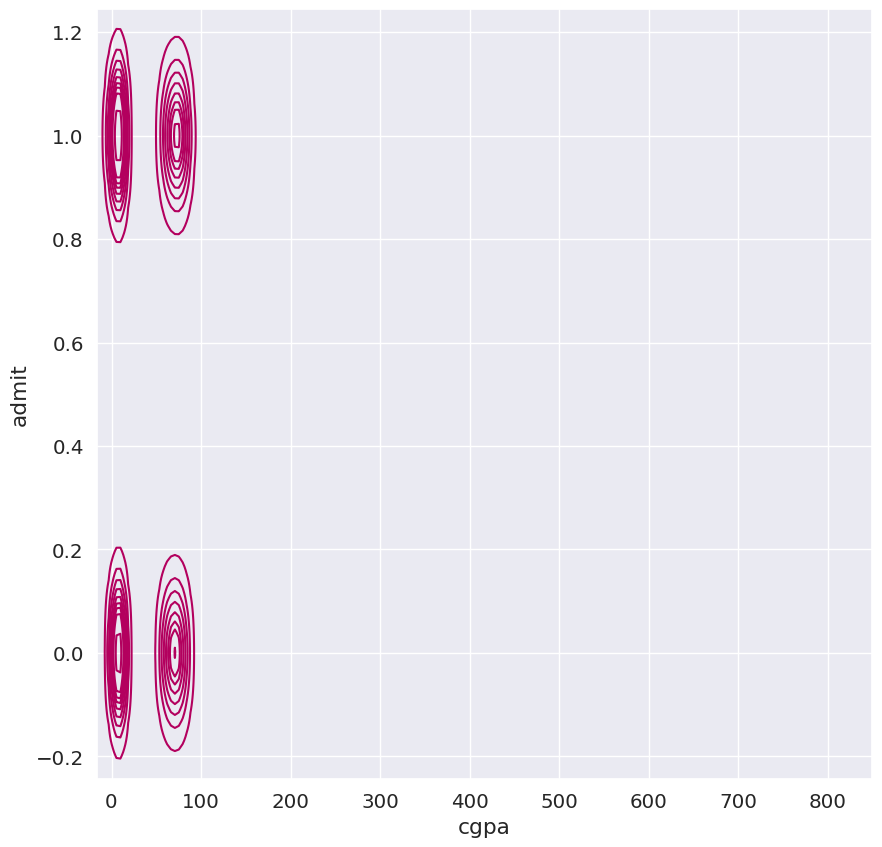

In [ ]:
sns.kdeplot(y='admit',x='cgpa',data=df, color=(179/255, 0/255, 94/255))

<Axes: xlabel='confPubs', ylabel='topperCgpa'>

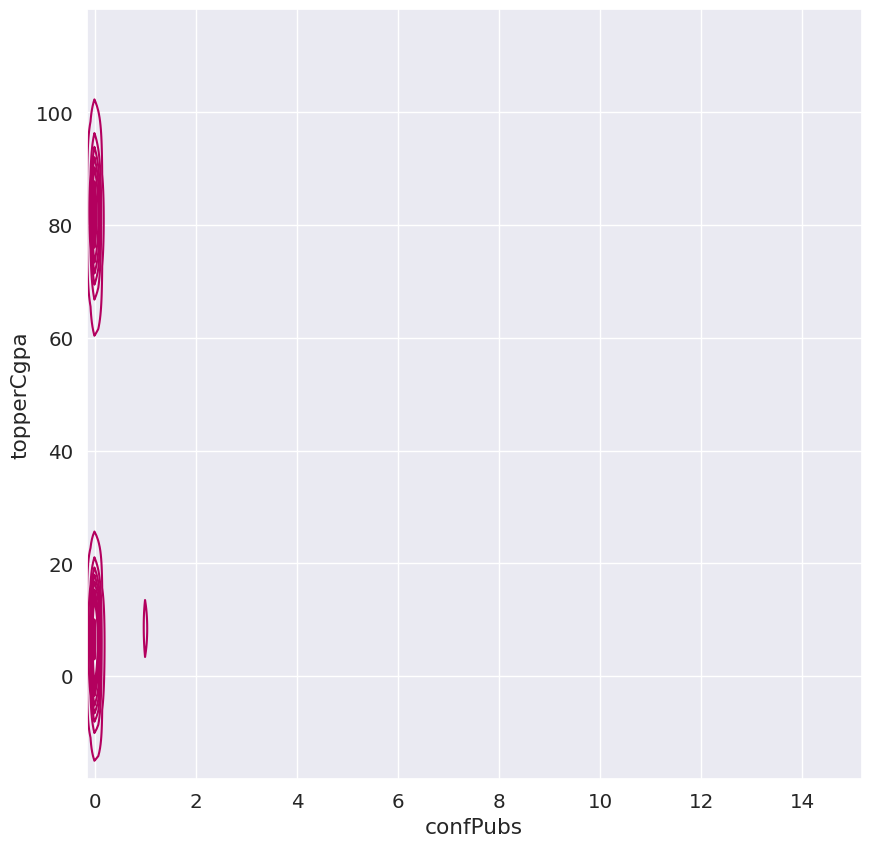

In [ ]:
sns.kdeplot(x='confPubs',y='topperCgpa',data=df, color=(179/255, 0/255, 94/255))

<Axes: xlabel='program', ylabel='total_scor'>

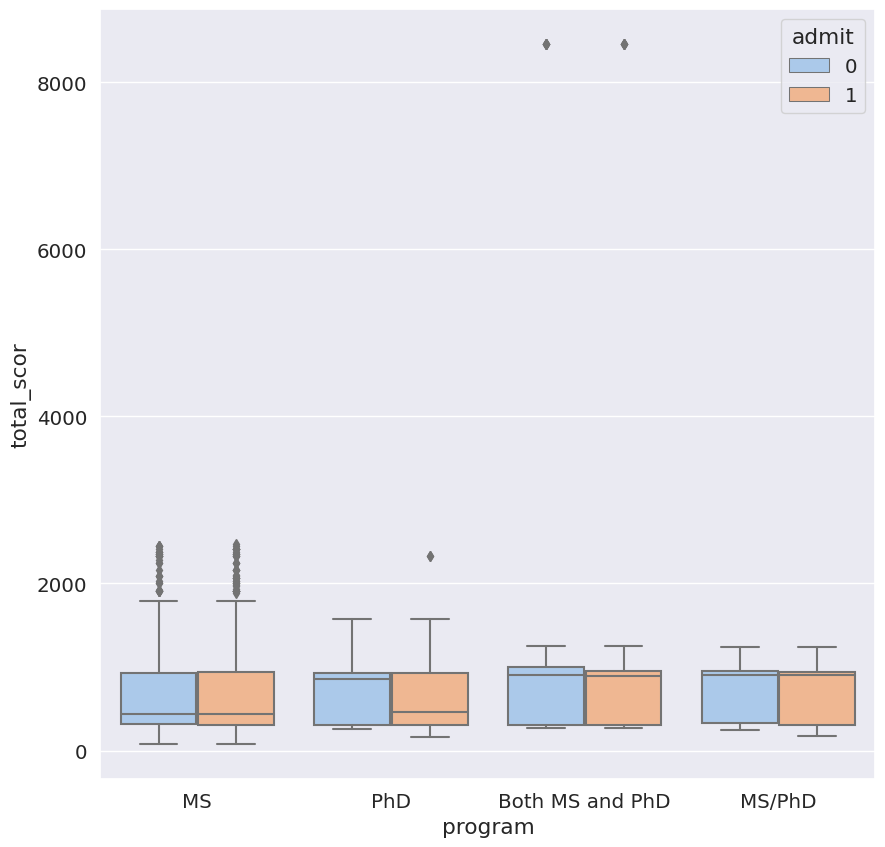

In [ ]:
sns.boxplot(y='total_scor',x='program',data=df,hue='admit',palette='pastel')

<Axes: xlabel='season', ylabel='total_scor'>

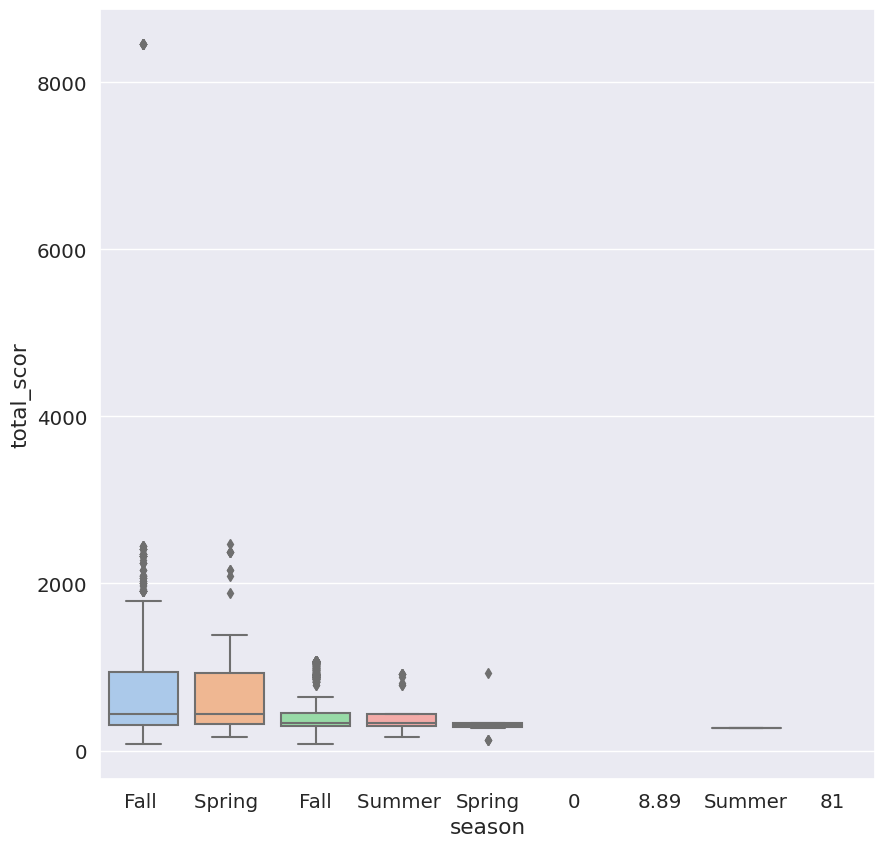

In [ ]:

sns.boxplot(y='total_scor',x='season',data=df,palette='pastel')

In [ ]:
df.columns
df.isna().sum()/len(df)*100
df.drop(['gmatA','gmatQ','gmatV','userProfileLink','termAndYear','cgpaScale','journalPubs','toeflEssay','specialization'], axis=1, inplace=True)
df.isna().sum()/len(df)*100
df.columns
for col in ['userName', 'major', 'researchExp', 'industryExp', 'toeflScore',
       'program', 'department', 'internExp', 'greV', 'greQ', 'greA',
       'topperCgpa', 'confPubs', 'ugCollege', 'cgpa', 'univName', 'admit',
       'total_scor', 'season', 'Year']:
    print(f'-------{col}-------')
    print(df[col].unique())
    print('________________________'*3)
numerical=['toeflScore','internExp','greV','greQ','greA','topperCgpa','total_scor']
categoriacal=['major','department','ugCollege','season','program','confPubs']
from sklearn.impute import SimpleImputer , KNNImputer
imputer = KNNImputer()
for fit in numerical:
    df[[fit]] = imputer.fit_transform(df[[fit]])
df.isna().sum()/len(df)*100
imputer = SimpleImputer(strategy='most_frequent')
for fit in categoriacal:
    df[fit] = imputer.fit_transform(df[[fit]])
df.isna().sum()/len(df)*100
new_df=pd.pivot_table(data=df, values ='confPubs',columns ='major',index ='admit')
new_df=pd.pivot_table(data=df, values ='total_scor',columns ='major',index ='admit')
df.groupby("univName").describe()[['topperCgpa','cgpa']].transpose()
df.groupby("major").describe()[['total_scor','confPubs']].transpose()
df.groupby("program").describe()[['total_scor','confPubs']].transpose()
df['confPubs'].unique()
df.drop_duplicates(subset='userName', keep='first',inplace= True)
df.drop(['total_scor','userName'], axis=1, inplace=True)
numerical=['internExp','topperCgpa','greV','confPubs','toeflScore']
df = pd.get_dummies(df, columns=['major', 'program', 'department', 'ugCollege','univName','season'], drop_first=True)



-------userName-------
['143saf' '7790ashish' 'AB25' ... 'vipulsharma0525' 'vishnu.chelle'
 'witty.pansy']
________________________________________________________________________
-------major-------
['Systems and Control' 'Manufacturing Engineering'
 '(MIS / MSIM / MSIS / MSIT)' nan 'MIS' 'MIS-management related courses'
 'Computer Science' 'Mechanical Engineering' 'Robotics'
 'Electronics and Communication' 'Information Systems'
 'Human Computer Interaction' 'Electrical Engineering' 'Game Development'
 'Information Technology' 'Finance'
 'Computer Graphics and Game Technology' 'Computer Engineering'
 'Computer Engineering / Computer Networking / Computer Science'
 'Telecommunication' 'Management Information System' 'Data Science'
 'Electronic and Telecommunication Engineering' 'Biomedical Engineering'
 'Industrial Engineering' 'CS' 'Biotechnology/bio-engineering'
 'software engineering' 'Mechatronics/Robotics' 'Engineering Management'
 'Automotive Engineering' 'Mechanical / Industria

In [ ]:
import numpy as np
class LogRegression():
    def __init__(self, learning_rate=1, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X_Fold, Y_Fold):
        self.n_samples, self.n_features = X_Fold.shape
        self.weights = np.zeros(self.n_features)
        self.bias = 0

        for i in range(self.iterations):
            linear_model = np.dot(X_Fold, self.weights) + self.bias
            Log_Pred = self._sigmoid(linear_model)
            dw = (1 / self.n_samples) * np.dot(X_Fold.T, (Log_Pred - Y_Fold))
            db = (1 / self.n_samples) * np.sum(Log_Pred - Y_Fold)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        return self

    def predict(self, X_Fold):
        linear_model = np.dot(X_Fold, self.weights) + self.bias
        Log_Pred = self._sigmoid(linear_model)
        Y_Pred = np.where(Log_Pred > 0.5, 1, 0)

        return Y_Pred

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, fbeta_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X = df.drop('admit', axis=1)
y = df['admit']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size=0.2)
Scaler=StandardScaler()
Scaler.fit(X_Train)
X_Train = Scaler.transform(X_Train)
X_Test = Scaler.transform(X_Test)



In [ ]:
MLModels = {
    "Naive Bayes": GaussianNB(),
    "LR": LogRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DT": DecisionTreeClassifier( criterion='gini', min_samples_leaf=1,min_samples_split=3, min_weight_fraction_leaf=0.0,random_state=1, splitter='best'),
    "RF": RandomForestClassifier(criterion='gini'),
    "XGB": XGBClassifier()
}


def TrainModels(model, X_Train, Y_Train, X_Test, Y_Test):
    model.fit(X_Train, Y_Train)
    Y_Pred = model.predict(X_Test)
    TraningAccuracy = accuracy_score(Y_Train, model.predict(X_Train))
    TestingAccuracy=accuracy_score(Y_Test, Y_Pred)
    ConfusionMatrix = confusion_matrix(Y_Test, Y_Pred)
    Recall = recall_score(Y_Test, Y_Pred)
    Precision = precision_score(Y_Test, Y_Pred)
    F1Score = f1_score(Y_Test, Y_Pred)
    return TraningAccuracy,TestingAccuracy, ConfusionMatrix, Recall, Precision, F1Score

for name, model in MLModels.items():
    print(f'Training Model {name} \n')
    TraningAccuracy, TestingAccuracy, ConfusionMatrix, Recall, Precision, F1Score = TrainModels(model, X_Train, Y_Train, X_Test, Y_Test)
    TraningAccuracyPct = TraningAccuracy*100
    TestingAccuracyPct = TestingAccuracy*100
    RecallPct = Recall*100
    PrecisionPct = Precision*100
    F1ScorePct = F1Score*100
    print(f'Training Accuracy: {TraningAccuracyPct:.2f}%')
    print(f'Testing Accuracy: {TestingAccuracyPct:.2f}%')
    print(f'Confusion Matrix: \n{ConfusionMatrix}')
    print(f'Recall: {RecallPct:.2f}%')
    print(f'Precision: {PrecisionPct:.2f}%')
    print(f'F-1: {F1ScorePct:.2f}%')
    print('-'*30)



Training Model Naive Bayes 

Training Accuracy: 51.14%
Testing Accuracy: 40.24%
Confusion Matrix: 
[[1089   48]
 [1721  102]]
Recall: 5.60%
Precision: 68.00%
F-1: 10.34%
------------------------------
Training Model LR 

Training Accuracy: 80.52%
Testing Accuracy: 68.92%
Confusion Matrix: 
[[ 547  590]
 [ 330 1493]]
Recall: 81.90%
Precision: 71.68%
F-1: 76.45%
------------------------------
Training Model KNN 

Training Accuracy: 74.10%
Testing Accuracy: 60.10%
Confusion Matrix: 
[[ 388  749]
 [ 432 1391]]
Recall: 76.30%
Precision: 65.00%
F-1: 70.20%
------------------------------
Training Model SVC 

Training Accuracy: 78.80%
Testing Accuracy: 68.24%
Confusion Matrix: 
[[ 437  700]
 [ 240 1583]]
Recall: 86.83%
Precision: 69.34%
F-1: 77.11%
------------------------------
Training Model DT 

Training Accuracy: 99.05%
Testing Accuracy: 68.72%
Confusion Matrix: 
[[ 653  484]
 [ 442 1381]]
Recall: 75.75%
Precision: 74.05%
F-1: 74.89%
------------------------------
Training Model RF 

Train

In [ ]:
##### Ensembling voting Classifier #######
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
VotingML = {
    "LR": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DT": DecisionTreeClassifier(criterion='gini', min_samples_leaf=1,min_samples_split=3, min_weight_fraction_leaf=0.0,random_state=1, splitter='best'),
    "RF": RandomForestClassifier(criterion='gini'),
    "XGB": XGBClassifier()
}
models = [(name, model) for name, model in VotingML.items()]
VotingModel = VotingClassifier(estimators=models, voting='hard', weights=[1,1,1,1,2,2])
VotingModel.fit(X_Train, Y_Train)
Voting_Pred = VotingModel.predict(X_Test)
VotingAccuracyTraining = accuracy_score(Y_Train, VotingModel.predict(X_Train))
VotingAccuracyTesting = accuracy_score(Y_Test,Voting_Pred)
print("Voting Classifier Training Accuracy: {:.2f}%".format(VotingAccuracyTraining*100))
print("Voting Classifier Testing Accuracy: {:.2f}%".format(VotingAccuracyTesting*100))
Voting_F1 = f1_score(Y_Test, Voting_Pred, average='weighted')
print("Voting Classifier F1 score: {:.2f}%".format(Voting_F1*100))

Voting Classifier Training Accuracy: 95.31%
Voting Classifier Testing Accuracy: 73.85%
Voting Classifier F1 score: 72.66%
